<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.630761,50.878630,84.910194,96.352073,114.486015,439.257673,-33.194617,472.452291
1,0.0,1.0,41.826182,91.682709,58.601903,46.576191,197.144250,445.831235,617.377660,-171.546425
2,0.0,2.0,93.042893,20.901199,75.291019,50.367851,-101.998298,147.604663,-57.847885,205.452549
3,0.0,3.0,70.850946,57.620903,76.177955,41.138938,-207.872809,47.915934,278.148361,-230.232428
4,0.0,4.0,56.104664,60.671707,46.915593,25.910565,410.321806,609.924334,475.592080,134.332255
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.835189,50.336717,42.376761,45.778651,89.638442,284.965759,89.290545,195.675214
19996,999.0,16.0,55.843384,86.057112,29.365172,22.341820,-359.962929,-156.355441,26.423491,-182.778932
19997,999.0,17.0,63.323291,51.077952,41.640605,60.362841,-99.832898,126.571791,220.319798,-93.748007
19998,999.0,18.0,71.516708,28.309450,28.765457,87.938656,161.643201,388.173471,273.143740,115.029731


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.630761,50.878630,84.910194,96.352073,114.486015,439.257673,-33.194617,472.452291
1,0.0,1.0,41.826182,91.682709,58.601903,46.576191,197.144250,445.831235,617.377660,-171.546425
2,0.0,2.0,93.042893,20.901199,75.291019,50.367851,-101.998298,147.604663,-57.847885,205.452549
3,0.0,3.0,70.850946,57.620903,76.177955,41.138938,-207.872809,47.915934,278.148361,-230.232428
4,0.0,4.0,56.104664,60.671707,46.915593,25.910565,410.321806,609.924334,475.592080,134.332255
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.835189,50.336717,42.376761,45.778651,89.638442,284.965759,89.290545,195.675214
19996,999.0,16.0,55.843384,86.057112,29.365172,22.341820,-359.962929,-156.355441,26.423491,-182.778932
19997,999.0,17.0,63.323291,51.077952,41.640605,60.362841,-99.832898,126.571791,220.319798,-93.748007
19998,999.0,18.0,71.516708,28.309450,28.765457,87.938656,161.643201,388.173471,273.143740,115.029731


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.630761,50.878630,84.910194,96.352073,114.486015,439.257673,-33.194617,472.452291
1,0.0,1.0,41.826182,91.682709,58.601903,46.576191,197.144250,445.831235,617.377660,-171.546425
2,0.0,2.0,93.042893,20.901199,75.291019,50.367851,-101.998298,147.604663,-57.847885,205.452549
3,0.0,3.0,70.850946,57.620903,76.177955,41.138938,-207.872809,47.915934,278.148361,-230.232428
4,0.0,4.0,56.104664,60.671707,46.915593,25.910565,410.321806,609.924334,475.592080,134.332255
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.835189,50.336717,42.376761,45.778651,89.638442,284.965759,89.290545,195.675214
19996,999.0,16.0,55.843384,86.057112,29.365172,22.341820,-359.962929,-156.355441,26.423491,-182.778932
19997,999.0,17.0,63.323291,51.077952,41.640605,60.362841,-99.832898,126.571791,220.319798,-93.748007
19998,999.0,18.0,71.516708,28.309450,28.765457,87.938656,161.643201,388.173471,273.143740,115.029731


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

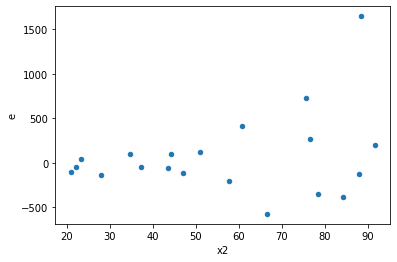

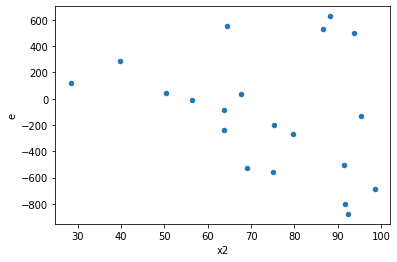

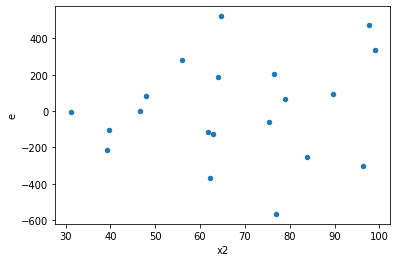

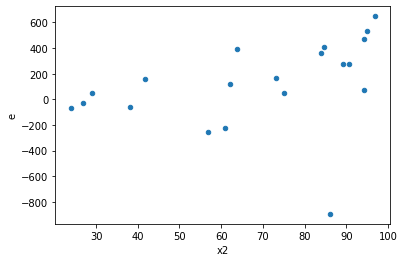

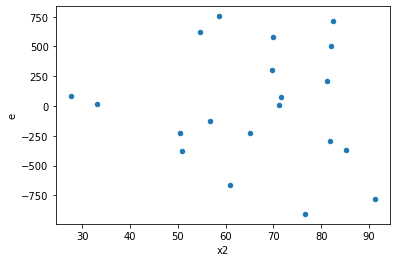

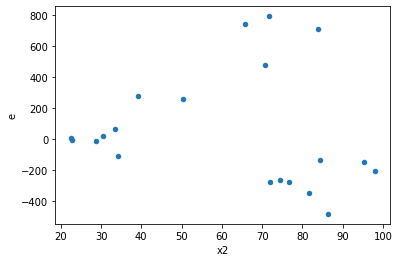

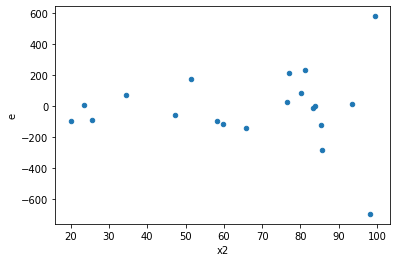

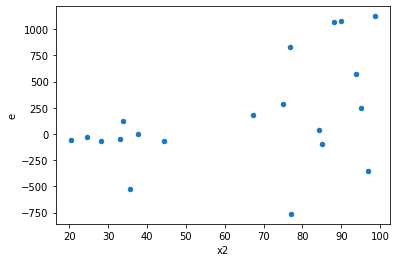

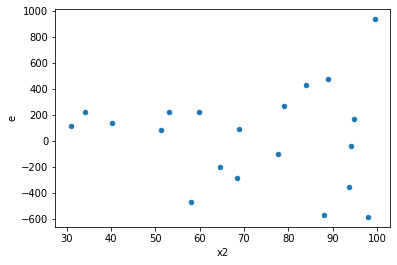

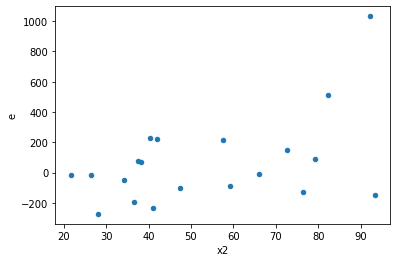

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,8748.218278073198,1459872.3451718937,2187.0545695182996,364968.0862929734,166.876534028759,0.00021205238925126046,0.9998939738053744,0.00010602619462563023,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,153504.4366029963,916825.6112250433,38376.10915074908,229206.40280626083,5.97263265814395,0.11161241815385536,0.9441937909230723,0.05580620907692768,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,4919.242454401397,191552.98883143903,1229.8106136003491,47888.24720785976,38.93952993921874,0.0036985795863897497,0.9981507102068051,0.0018492897931948749,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,103213.59105072226,516104.6038544127,25803.397762680564,129026.15096360317,5.000355075338706,0.14813171083691934,0.9259341445815403,0.07406585541845967,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,1167310.0358856206,1981228.9012935448,291827.50897140516,495307.2253233862,1.6972602311179619,0.6208771951402909,0.6895614024298545,0.31043859757014547,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,36515.956844317916,703248.0378957081,9128.989211079479,175812.00947392703,19.258650153792626,0.014138330917633057,0.9929308345411835,0.007069165458816529,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,4424.53424021274,226680.9568584363,1106.133560053185,56670.23921460907,51.23272745823231,0.0021711363281169405,0.9989144318359415,0.0010855681640584702,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,12449.955429781958,821538.7560017842,3112.4888574454894,205384.68900044606,65.98728490517755,0.0013238009542015927,0.9993380995228992,0.0006619004771007964,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,164086.52289706477,723941.7476599349,41021.63072426619,180985.43691498373,4.411951297877645,0.1796188363662765,0.9101905818168617,0.08980941818313826,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,8748.218278073198,1459872.3451718937,2187.0545695182996,364968.0862929734,166.876534028759,0.00021205238925126046,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,153504.4366029963,916825.6112250433,38376.10915074908,229206.40280626083,5.97263265814395,0.11161241815385536,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,4919.242454401397,191552.98883143903,1229.8106136003491,47888.24720785976,38.93952993921874,0.0036985795863897497,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,103213.59105072226,516104.6038544127,25803.397762680564,129026.15096360317,5.000355075338706,0.14813171083691934,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,1167310.0358856206,1981228.9012935448,291827.50897140516,495307.2253233862,1.6972602311179619,0.6208771951402909,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,36515.956844317916,703248.0378957081,9128.989211079479,175812.00947392703,19.258650153792626,0.014138330917633057,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,4424.53424021274,226680.9568584363,1106.133560053185,56670.23921460907,51.23272745823231,0.0021711363281169405,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,12449.955429781958,821538.7560017842,3112.4888574454894,205384.68900044606,65.98728490517755,0.0013238009542015927,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,164086.52289706477,723941.7476599349,41021.63072426619,180985.43691498373,4.411951297877645,0.1796188363662765,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      512
Reject005=0 : Heteroscedasticity    488
Name: Result_test, dtype: int64